# Udacity - Communicate Data Findings (Dataset: Loan Data from Prosper
## by Mustafa Ahmed Hemdan

## Overview and Notes 

This dataset contains data from over 100,000 prosper loans. 
Each row contains information about a specific loan that was funded through the Prosper marketplace. 

#### What is prosper? 
Prosper is a San Francisco based company in the peer-to-peer lending marketplace in the United States. Since 2005, 
Prosper has facilitated more than $15 billion in loans to more than 930,000 people.

In [1]:
# import pakages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

In [2]:
# Load data csv 
loan = pd.read_csv('prosperLoanData.csv')
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
loan.shape

(113937, 81)

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

- This dataset is filled with a ton of personal information on our borrowers. Some of the standard finance metrics are quite helpful on their own. (DebtToIncomeRatio, CreditGrade, StatedMonthlyIncome, RevolvingCreditBalance, BorrowerAPR, etc.), by combining these variables I think we should be able to better understanding our borrowers and gather some interesting insights .

### Main feature of interest in the dataset :
- borrowers financial health, income levels, debt ratios 
- reasons for borrowing money 
- the amount of interest they are paying 


In [5]:
#  Creat a new column (CreditScoreMean) which will be the mean of CreditScoreRangeLower and CreditScoreRangeUpper 
# which will reduse the amount of variables for analysis 
loan['CreditScoreMean'] = loan[['CreditScoreRangeLower', 'CreditScoreRangeUpper']].mean(axis = 1)

In [6]:
# Collect my columns which i'll use for analysis 
loan_final = loan[['ListingCreationDate', 'CreditScoreMean', 'Occupation', 'EmploymentStatus','ProsperScore', 'Term', 'MonthlyLoanPayment', \
                             'StatedMonthlyIncome', 'BorrowerAPR', 'DebtToIncomeRatio','RevolvingCreditBalance', \
                             'BorrowerState', 'ListingCategory (numeric)']]

In [7]:
loan_final.head()

,ListingCreationDate,CreditScoreMean,Occupation,EmploymentStatus,ProsperScore,Term,MonthlyLoanPayment,StatedMonthlyIncome,BorrowerAPR,DebtToIncomeRatio,RevolvingCreditBalance,BorrowerState,ListingCategory (numeric)
0,2007-08-26 19:09:29.263000000,649.5,Other,Self-employed,NaN,36,330.43,3083.333333,0.16516,0.17,0.0,CO,0
1,2014-02-27 08:28:07.900000000,689.5,Professional,Employed,7.0,36,318.93,6125.000000,0.12016,0.18,3989.0,CO,2
2,2007-01-05 15:00:47.090000000,489.5,Other,Not available,NaN,36,123.32,2083.333333,0.28269,0.06,NaN,GA,0
3,2012-10-22 11:02:35.010000000,809.5,Skilled Labor,Employed,9.0,36,321.45,2875.000000,0.12528,0.15,1444.0,GA,16
4,2013-09-14 18:38:39.097000000,689.5,Executive,Employed,4.0,36,563.97,9583.333333,0.24614,0.26,6193.0,MN,2


In [8]:
loan_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113937 non-null  object 
 1   CreditScoreMean            113346 non-null  float64
 2   Occupation                 110349 non-null  object 
 3   EmploymentStatus           111682 non-null  object 
 4   ProsperScore               84853 non-null   float64
 5   Term                       113937 non-null  int64  
 6   MonthlyLoanPayment         113937 non-null  float64
 7   StatedMonthlyIncome        113937 non-null  float64
 8   BorrowerAPR                113912 non-null  float64
 9   DebtToIncomeRatio          105383 non-null  float64
 10  RevolvingCreditBalance     106333 non-null  float64
 11  BorrowerState              108422 non-null  object 
 12  ListingCategory (numeric)  113937 non-null  int64  
dtypes: float64(7), int64(2), obje

## Variables i am using for analysis :


__CreditScoreMean:__ This column is the mean of CreditScoreRangeLower and CreditScoreRangeUpper.<br>

__ProsperScore:__ A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.<br>

__Term:__ The length of the loan expressed in months.<br>

__MonthlyLoanPayment:__ The scheduled monthly loan payment.<br>

__StatedMonthlyIncome:__ The monthly income the borrower stated at the time the listing was created.<br>

__BorrowerAPR:__ The Borrower's Annual Percentage Rate (APR) for the loan.<br>

__DebtToIncomeRatio:__ The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).<br>

__RevolvingCreditBalance:__ Dollars of revolving credit at the time the credit profile was pulled.<br>

__BorrowerState:__ The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.<br>

__ListingCategory:__ Determines the category of loan that the borrower needs money for.<br>
__Occupation:__The Occupation selected by the Borrower at the time they created the listing.<br>
__EmploymentStatus:__The employment status of the borrower at the time they posted the listing.<br>

## Univariate Exploration

In [9]:
# Convert to date time column 
loan_final['ListingCreationDate'] = pd.to_datetime(loan_final['ListingCreationDate'])

In [10]:
# Create a quarters column from the creation date for analyzing 
quarters = pd.Series(loan_final['ListingCreationDate'])
quarters = pd.PeriodIndex(quarters, freq = 'Q')
loan_final['Quarters'] = quarters

In [11]:
loan_final.head()

,ListingCreationDate,CreditScoreMean,Occupation,EmploymentStatus,ProsperScore,Term,MonthlyLoanPayment,StatedMonthlyIncome,BorrowerAPR,DebtToIncomeRatio,RevolvingCreditBalance,BorrowerState,ListingCategory (numeric),Quarters
0,2007-08-26 19:09:29.263,649.5,Other,Self-employed,NaN,36,330.43,3083.333333,0.16516,0.17,0.0,CO,0,2007Q3
1,2014-02-27 08:28:07.900,689.5,Professional,Employed,7.0,36,318.93,6125.000000,0.12016,0.18,3989.0,CO,2,2014Q1
2,2007-01-05 15:00:47.090,489.5,Other,Not available,NaN,36,123.32,2083.333333,0.28269,0.06,NaN,GA,0,2007Q1
3,2012-10-22 11:02:35.010,809.5,Skilled Labor,Employed,9.0,36,321.45,2875.000000,0.12528,0.15,1444.0,GA,16,2012Q4
4,2013-09-14 18:38:39.097,689.5,Executive,Employed,4.0,36,563.97,9583.333333,0.24614,0.26,6193.0,MN,2,2013Q3


In [12]:
quarters = loan_final['Quarters'].unique()
quarters


<PeriodArray>
['2007Q3', '2014Q1', '2007Q1', '2012Q4', '2013Q3', '2013Q4', '2013Q2',
 '2012Q2', '2007Q4', '2006Q3', '2013Q1', '2010Q2', '2012Q1', '2012Q3',
 '2010Q4', '2011Q4', '2008Q3', '2007Q2', '2006Q4', '2011Q1', '2011Q2',
 '2008Q2', '2009Q3', '2011Q3', '2008Q1', '2006Q2', '2010Q1', '2010Q3',
 '2006Q1', '2009Q4', '2009Q2', '2008Q4', '2005Q4']
Length: 33, dtype: period[Q-DEC]

In [13]:
type_order = sorted(quarters)

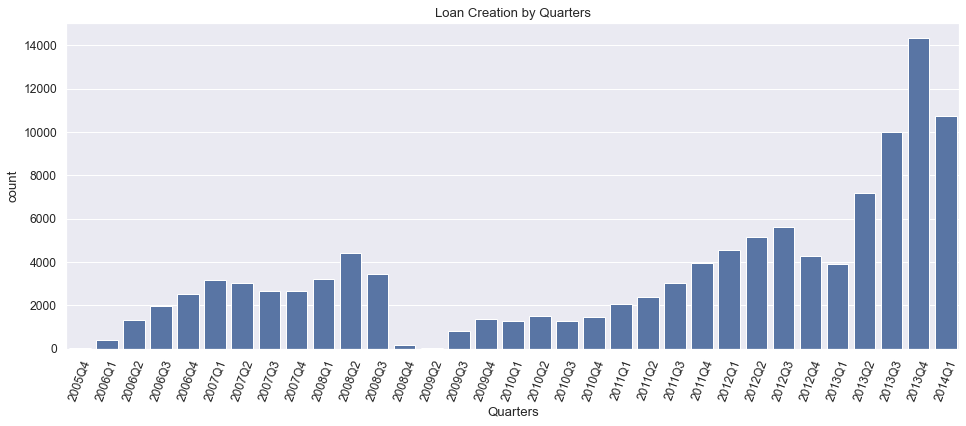

In [14]:
# Plot a barchart for Quarters 
plt.figure(figsize = (16, 6))
sns.set(font_scale = 1.1)
base_color = sns.color_palette()[0]
g = sns.countplot(data = loan_final, x= 'Quarters', order = type_order, color = base_color)
plt.xticks(rotation = 70)
plt.title('Loan Creation by Quarters');

- From the plot we can see that at Q3 2008 the loans droped significantly which was at the time of the economic crisis of 2008, after that there's was a slightly increase to Q3 2012, it then droped slightly in Q4 2012 and Q1 2013, after that there's a huge amount of increase in the loans 

In [15]:
loan_final['CreditScoreMean'].describe()

count    113346.000000
mean        695.067731
std          66.458275
min           9.500000
25%         669.500000
50%         689.500000
75%         729.500000
max         889.500000
Name: CreditScoreMean, dtype: float64

In [16]:
type_order = sorted(loan_final['CreditScoreMean'].unique())
type_order

[9.5,
 369.5,
 429.5,
 449.5,
 469.5,
 489.5,
 509.5,
 529.5,
 549.5,
 569.5,
 589.5,
 609.5,
 629.5,
 649.5,
 669.5,
 689.5,
 709.5,
 729.5,
 749.5,
 769.5,
 789.5,
 809.5,
 829.5,
 849.5,
 869.5,
 nan,
 889.5]

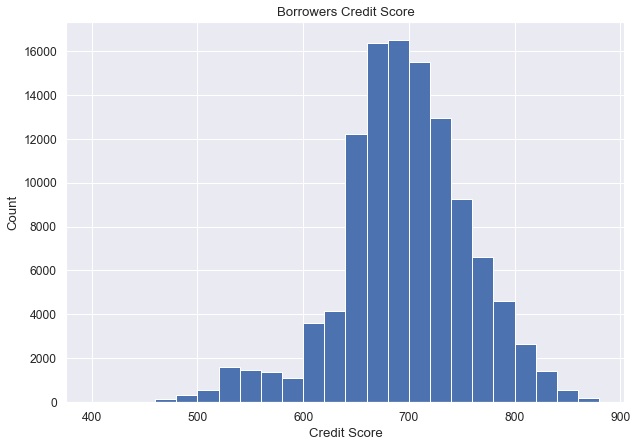

In [17]:
# Plot a histogram for the CreditScoreMean 
plt.figure(figsize = (10, 7))
bins = np.arange(400, 900, 20)
plt.hist(data = loan_final, x = 'CreditScoreMean', bins = bins)
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Borrowers Credit Score');

- From this plot most of borrowers have credit score between 650 - 800, According to Experian which is one of the credit report agencies in the US: "a credit score of 700 or above is generally considered good. A score of 800 or above on the same range is considered to be excellent, so aour borrowers here are slightly above average 

In [18]:
type_order = loan_final['Occupation'].unique()


In [19]:
loan_final['Occupation'].value_counts().sort_values(ascending = False).head(10)

Other                       28617
Professional                13628
Computer Programmer          4478
Executive                    4311
Teacher                      3759
Administrative Assistant     3688
Analyst                      3602
Sales - Commission           3446
Accountant/CPA               3233
Clerical                     3164
Name: Occupation, dtype: int64

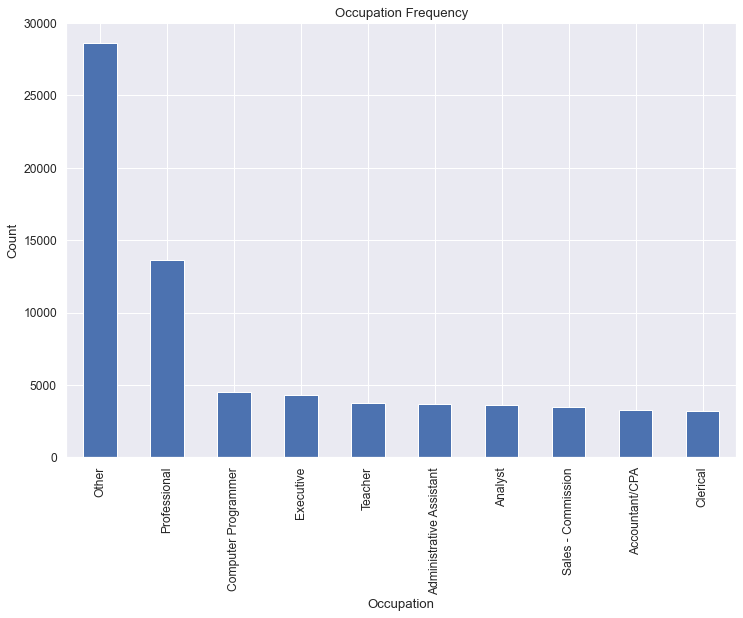

In [20]:
# Plot a bar chart for Occupation Frequency 
loan_final['Occupation'].value_counts().sort_values(ascending = False).head(10).plot(kind='bar', figsize=(12,8))
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation Frequency');

- From the plot above it seems that the count of most occupation is the same, but the majority of the occupation is for Proffesional and other occupations 

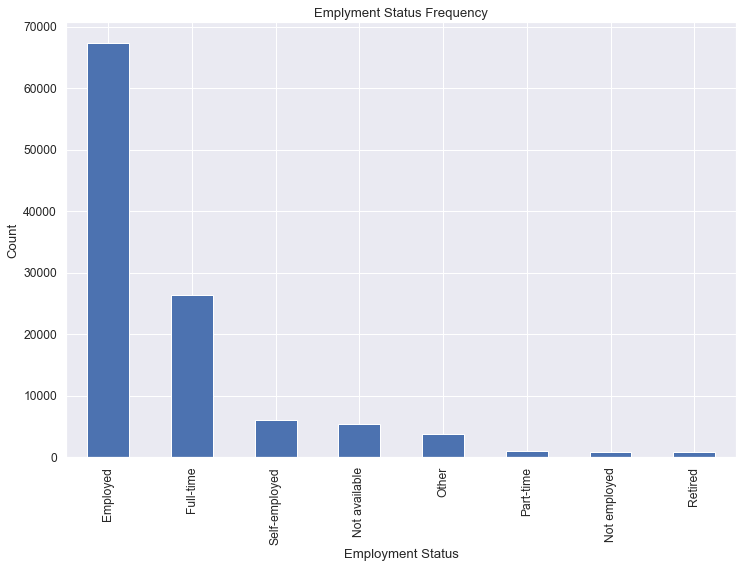

In [21]:
# Plot a bar chart for Emplyment Status 
loan_final['EmploymentStatus'].value_counts().sort_values(ascending = False).head(10).plot(kind='bar', figsize=(12,8))
plt.title('Emplyment Status Frequency')
plt.xlabel('Employment Status')
plt.ylabel('Count');

- Most of borrowers are employed with full time jobs 

In [22]:
loan_final['ProsperScore'].value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [23]:
loan_final['ProsperScore'].describe()

count    84853.000000
mean         5.950067
std          2.376501
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: ProsperScore, dtype: float64

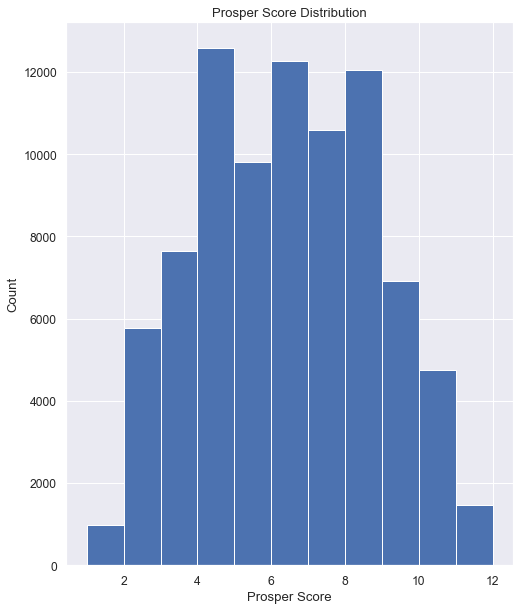

In [24]:
# Plot a histogram for ProsperScore
bins = np.arange(1, 13, 1)
plt.figure(figsize = (8, 10))
plt.hist(data = loan_final, x ='ProsperScore', bins = bins)
plt.xlabel('Prosper Score')
plt.ylabel('Count')
plt.title('Prosper Score Distribution');

- The highest prosper score is 4-5 which indicates that most loans are at hish risk, though 6-7 and 8-9 prosper scores appears in second place   

In [25]:
loan_final.head()

,ListingCreationDate,CreditScoreMean,Occupation,EmploymentStatus,ProsperScore,Term,MonthlyLoanPayment,StatedMonthlyIncome,BorrowerAPR,DebtToIncomeRatio,RevolvingCreditBalance,BorrowerState,ListingCategory (numeric),Quarters
0,2007-08-26 19:09:29.263,649.5,Other,Self-employed,NaN,36,330.43,3083.333333,0.16516,0.17,0.0,CO,0,2007Q3
1,2014-02-27 08:28:07.900,689.5,Professional,Employed,7.0,36,318.93,6125.000000,0.12016,0.18,3989.0,CO,2,2014Q1
2,2007-01-05 15:00:47.090,489.5,Other,Not available,NaN,36,123.32,2083.333333,0.28269,0.06,NaN,GA,0,2007Q1
3,2012-10-22 11:02:35.010,809.5,Skilled Labor,Employed,9.0,36,321.45,2875.000000,0.12528,0.15,1444.0,GA,16,2012Q4
4,2013-09-14 18:38:39.097,689.5,Executive,Employed,4.0,36,563.97,9583.333333,0.24614,0.26,6193.0,MN,2,2013Q3


In [26]:
loan_final['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

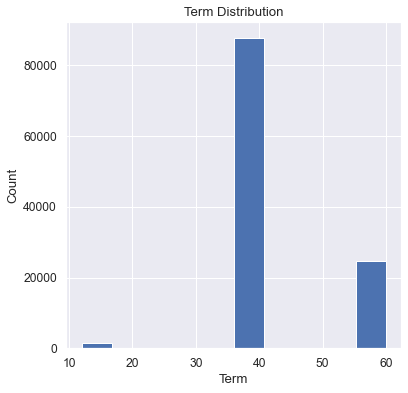

In [27]:
# Plot Histogram for Term 
plt.figure(figsize = (6, 6))
plt.hist(data = loan_final, x = 'Term')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Term Distribution');

- The majority of borrowers is to make a loan for 36 months term, knowing that Prosper loans are given in 12, 36 and 60 month terms

In [28]:
loan_final['MonthlyLoanPayment'].value_counts().sort_values(ascending = False).head(10)

173.71    2423
0.00       935
172.76     536
86.85      472
174.20     460
130.28     370
163.28     286
326.62     280
136.98     277
166.54     277
Name: MonthlyLoanPayment, dtype: int64

In [29]:
loan_final['MonthlyLoanPayment'].describe()

count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

In [30]:
loan_final['MonthlyLoanPayment'].nunique()

23567

In [31]:
loan_final['MonthlyLoanPayment'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, .97, 1])

0.00       0.00
0.10      79.44
0.20     116.13
0.30     151.29
0.40     173.71
0.50     217.74
0.60     278.28
0.70     339.59
0.80     404.27
0.90     535.91
0.97     733.02
1.00    2251.51
Name: MonthlyLoanPayment, dtype: float64

In [32]:
# Select monthly payemnt only  below 800
loan_final = loan_final[loan_final.MonthlyLoanPayment  < 800]

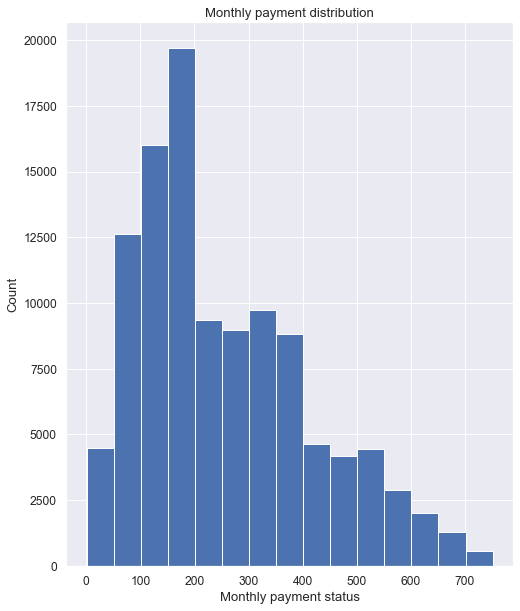

In [33]:
# Plot the monthly payment distribution
bins = np.arange(1, 800, 50)
plt.figure(figsize = (8, 10))
plt.hist(data = loan_final, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('Monthly payment status')
plt.ylabel('Count')
plt.title('Monthly payment distribution');

- The plot looks right skewed with The majority of monthly payment is below 400, with highest frequency between 100-200

In [34]:
loan_final['StatedMonthlyIncome'].nunique()

13154

In [35]:
loan_final['StatedMonthlyIncome'].value_counts().sort_values(ascending = False).head(20)

4166.666667    3508
5000.000000    3355
3333.333333    2903
3750.000000    2415
5416.666667    2343
5833.333333    2296
2500.000000    2246
6250.000000    2246
4583.333333    2197
6666.666667    2107
2916.666667    1976
8333.333333    1583
4333.333333    1519
7083.333333    1418
7500.000000    1399
3500.000000    1389
0.000000       1343
2083.333333    1253
4000.000000    1250
3000.000000    1210
Name: StatedMonthlyIncome, dtype: int64

In [36]:
loan_final['StatedMonthlyIncome'].describe()

count    1.112040e+05
mean     5.482413e+03
std      7.400225e+03
min      0.000000e+00
25%      3.166667e+03
50%      4.583333e+03
75%      6.666667e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

- From the description seems to be there are borrowers with stated monthly income above 200,000. one borrower received 1,750,000 monthly income, although most borrowers are received from 0-10k monthly, so in my analysis i'll zoom out the incomes from 0-20k 

In [37]:
loan_final = loan_final[loan_final.StatedMonthlyIncome < 20000]

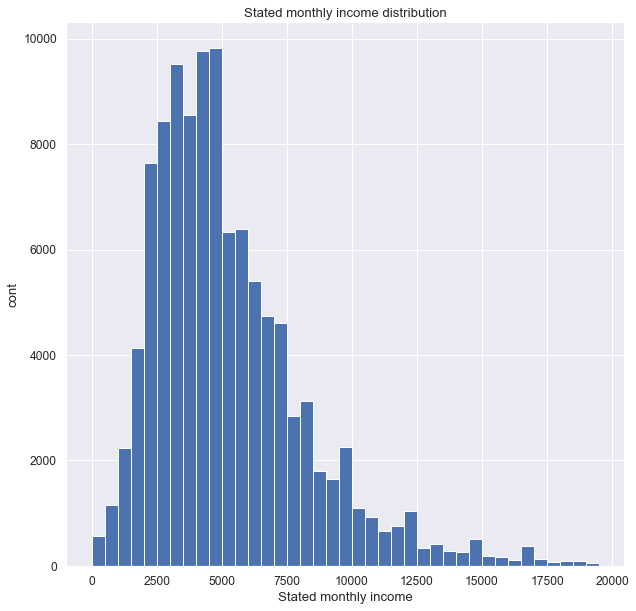

In [38]:
# Plot a histogram for stated monthly income 
bins = np.arange(1, 20000, 500)
plt.figure(figsize = (10, 10))
plt.hist(data= loan_final, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('Stated monthly income')
plt.ylabel('cont')
plt.title('Stated monthly income distribution');

- The plot seems to be right skewed, most of the borrowers receive monthly income from 4000-6000 and then the plot fall off with the increase of the monthly income which make sense  

In [39]:
loan_final['BorrowerAPR'].value_counts()

0.35797    3639
0.35643    1633
0.37453    1252
0.30532     891
0.29510     743
           ... 
0.18494       1
0.09348       1
0.21535       1
0.27000       1
0.29691       1
Name: BorrowerAPR, Length: 6602, dtype: int64

In [40]:
loan_final['BorrowerAPR'].unique()

array([0.16516, 0.12016, 0.28269, ..., 0.22674, 0.3477 , 0.19543])

In [41]:
loan_final['BorrowerAPR'].describe()

count    110138.000000
mean          0.220117
std           0.080697
min           0.006530
25%           0.157130
50%           0.211660
75%           0.285740
max           0.512290
Name: BorrowerAPR, dtype: float64

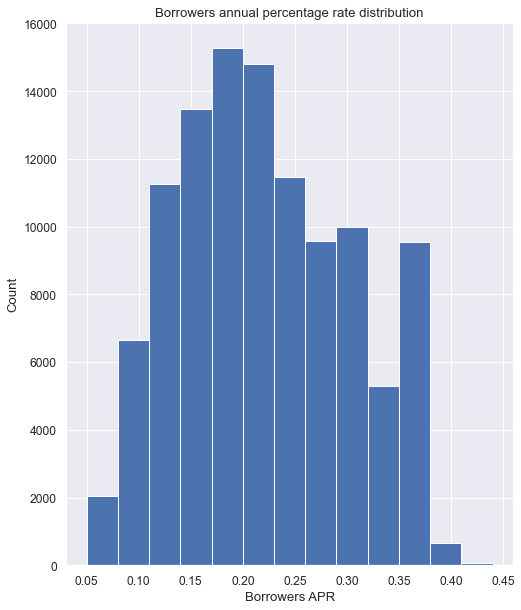

In [42]:
# Plot Histogram for the borrowerrs Annual percentage rate  
bins = np.arange(0.05, 0.45, 0.03)
plt.figure(figsize = (8,10))
plt.hist(data = loan_final, x = 'BorrowerAPR', bins = bins)
plt.title('Borrowers annual percentage rate distribution')
plt.xlabel('Borrowers APR')
plt.ylabel('Count');


- The plot seems to be normally distributed, with larg amount of annual percentage rate in 0.15-0.25, and also high in 0.35-0.375 which is too much for annual percentage rate.

In [43]:
loan_final['DebtToIncomeRatio'].value_counts()

0.18000    4010
0.22000    3561
0.17000    3478
0.14000    3438
0.20000    3368
           ... 
0.04983       1
0.15248       1
0.19893       1
0.08128       1
0.21177       1
Name: DebtToIncomeRatio, Length: 1179, dtype: int64

In [44]:
loan_final['DebtToIncomeRatio'].unique()

array([0.17   , 0.18   , 0.06   , ..., 0.14225, 0.3108 , 0.23284])

In [45]:
loan_final['DebtToIncomeRatio'].describe()

count    101859.000000
mean          0.275158
std           0.537062
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

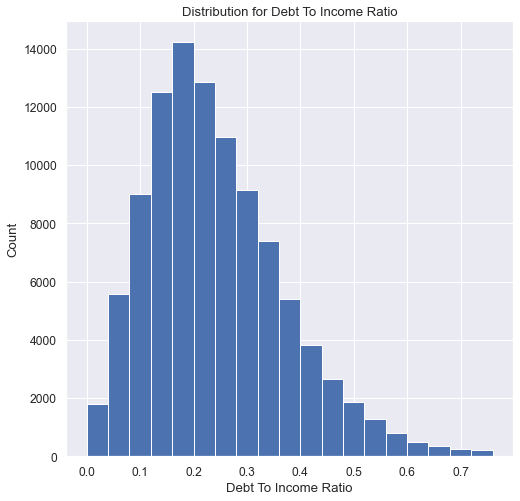

In [46]:
# Plot a distribution for Debt to income ratio < 1 
bins = np.arange(0, 0.8, 0.04)
plt.figure(figsize = (8, 8))
plt.hist(data = loan_final, x ='DebtToIncomeRatio', bins = bins)
plt.title('Distribution for Debt To Income Ratio')
plt.xlabel('Debt To Income Ratio')
plt.ylabel('Count');

- The plot is right skewed, the highest ratio here is from 0.15-0.2,  Based on standard finance metrics if you have a Debt To RationIncome below 0.36 it's considered to be quite good, so the majority of these people seem to be in pretty good financial health

In [47]:
loan_final['RevolvingCreditBalance'].value_counts()

0.0        3989
59.0         34
39.0         30
75.0         27
3.0          26
           ... 
60540.0       1
17463.0       1
45543.0       1
27541.0       1
47132.0       1
Name: RevolvingCreditBalance, Length: 37030, dtype: int64

In [48]:
loan_final['RevolvingCreditBalance'].unique()

array([    0.,  3989.,    nan, ..., 21812., 40731., 89961.])

In [49]:
loan_final['RevolvingCreditBalance'].describe()

count    102803.000000
mean      16412.183088
std       28157.412990
min           0.000000
25%        3037.000000
50%        8285.000000
75%       18662.000000
max      999165.000000
Name: RevolvingCreditBalance, dtype: float64

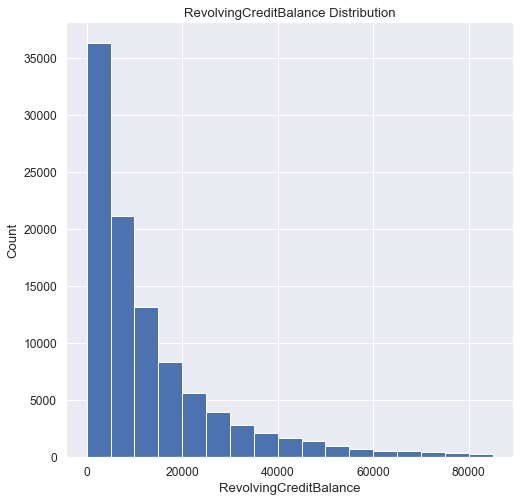

In [50]:
# Plot the distribution of RevolvingCreditBalance
bins = np.arange(0, 90000, 5000)
plt.figure(figsize = (8, 8))
plt.hist(data = loan_final, x = 'RevolvingCreditBalance', bins = bins)
plt.xlabel('RevolvingCreditBalance')
plt.ylabel('Count')
plt.title('RevolvingCreditBalance Distribution');

- a right skewed distribution, shows that most of the borrowers have RevolvingCreditBalance less than 10,000. 

In [51]:
loan_final['BorrowerState'].value_counts()

CA    14040
TX     6566
FL     6510
NY     6434
IL     5718
GA     4839
OH     4119
MI     3521
VA     3168
NC     3004
WA     2963
NJ     2950
PA     2882
MD     2709
MO     2565
MN     2269
MA     2147
CO     2143
IN     2029
AZ     1828
WI     1801
OR     1772
TN     1701
AL     1650
CT     1552
SC     1098
NV     1054
KS     1037
KY      963
OK      947
LA      933
UT      848
AR      842
MS      765
NE      661
ID      586
NH      520
NM      451
RI      426
HI      396
WV      384
DC      355
MT      325
DE      296
VT      203
AK      189
SD      186
IA      180
WY      148
ME       99
ND       52
Name: BorrowerState, dtype: int64

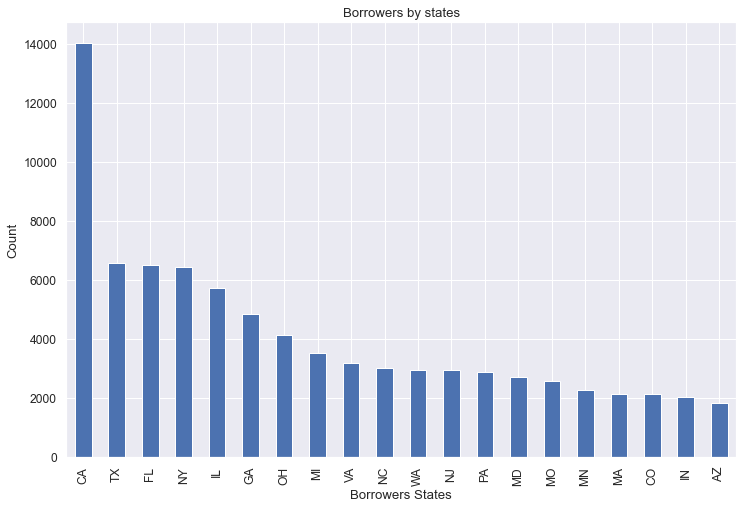

In [52]:
# Plot the distribution for top 15 states our borrowers from 
loan_final['BorrowerState'].value_counts().sort_values(ascending = False).head(20).plot(kind='bar', figsize=(12,8))
plt.xlabel('Borrowers States')
plt.ylabel('Count')
plt.title('Borrowers by states');

- Most Borrowers are from california, texas,Florida and newyork.

In [53]:
loan_final['ListingCategory (numeric)'].value_counts()

1     56397
0     16176
7     10309
2      7155
3      6810
6      2562
4      2350
13     1972
15     1504
14      846
18      842
19      757
5       751
20      749
16      302
11      209
8       191
10       89
9        82
12       57
17       51
Name: ListingCategory (numeric), dtype: int64

In [54]:
# First change the name of the column for use and change it's type to string
loan_final.rename(columns={'ListingCategory (numeric)' : 'ListingCategory'}, inplace = True)
loan_final['ListingCategory'] = loan_final['ListingCategory'].astype('str')

In [55]:
# Change the numeric data in the column to it's definition and change it's type to category 
cat_def = {'0': 'Not Available', '1': 'Debt Consolidation', '2': 'Home Improvement', '3': 'Business', '4': 'Personal Loan', '5': 'Student Use', '6': 'Auto', '7': 'Other', '8': 'Baby&Adoption', '9': 'Boat', '10': 'Cosmetic Procedure', '11': 'Engagement Ring', '12': 'Green Loans', '13': 'Household Expenses', '14': 'Large Purchases', '15': 'Medical/Dental', '16': 'Motorcycle', '17': 'RV', '18': 'Taxes', '19': 'Vacation', '20': 'Wedding Loans'}
loan_final['ListingCategory'].replace(cat_def, inplace = True)
loan_final['ListingCategory'] = loan_final['ListingCategory'].astype('category')

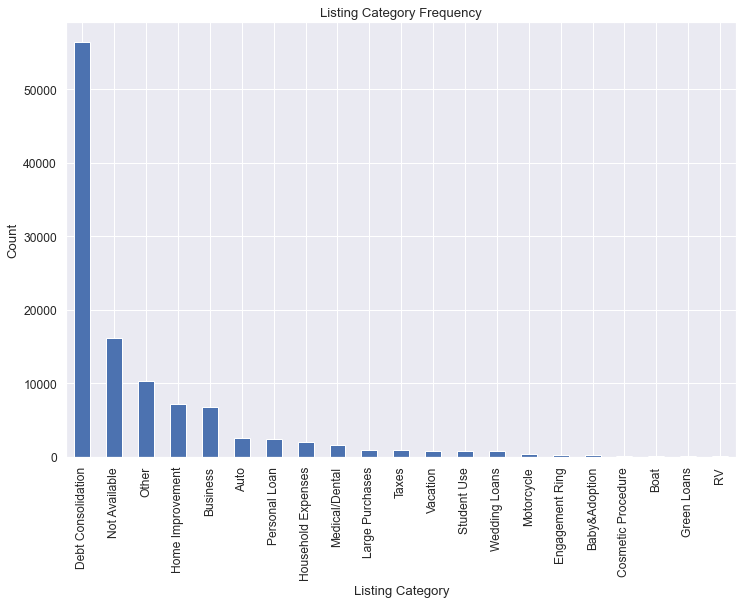

In [56]:
loan_final['ListingCategory'].value_counts().sort_values(ascending = False).plot(kind = 'bar', figsize = (12, 8))
plt.xlabel('Listing Category')
plt.ylabel('Count')
plt.title('Listing Category Frequency');

- by far Most of the Borrowers selecting Debt Consolidation when posting their listing 

## Some Of Univariate Main Conclusion
- some of the data points seem to be telling completely different stories. Once I got to the APR distribution I started to believe that these borrowers must be in severe financial trouble. but most of the other data showed otherwise, they had slightly above average credit scores, very good debt to income ratios and minimal revolving credit balances. They also seem quite financially responsible as they are being proactive in trying to improve their financial situations by going to consolidate their debt.

# Bivariate Exploration

In [57]:
loan_final.head()

,ListingCreationDate,CreditScoreMean,Occupation,EmploymentStatus,ProsperScore,Term,MonthlyLoanPayment,StatedMonthlyIncome,BorrowerAPR,DebtToIncomeRatio,RevolvingCreditBalance,BorrowerState,ListingCategory,Quarters
0,2007-08-26 19:09:29.263,649.5,Other,Self-employed,NaN,36,330.43,3083.333333,0.16516,0.17,0.0,CO,Not Available,2007Q3
1,2014-02-27 08:28:07.900,689.5,Professional,Employed,7.0,36,318.93,6125.000000,0.12016,0.18,3989.0,CO,Home Improvement,2014Q1
2,2007-01-05 15:00:47.090,489.5,Other,Not available,NaN,36,123.32,2083.333333,0.28269,0.06,NaN,GA,Not Available,2007Q1
3,2012-10-22 11:02:35.010,809.5,Skilled Labor,Employed,9.0,36,321.45,2875.000000,0.12528,0.15,1444.0,GA,Motorcycle,2012Q4
4,2013-09-14 18:38:39.097,689.5,Executive,Employed,4.0,36,563.97,9583.333333,0.24614,0.26,6193.0,MN,Home Improvement,2013Q3


In [58]:
loan_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110161 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ListingCreationDate     110161 non-null  datetime64[ns]
 1   CreditScoreMean         109591 non-null  float64       
 2   Occupation              106643 non-null  object        
 3   EmploymentStatus        107961 non-null  object        
 4   ProsperScore            82281 non-null   float64       
 5   Term                    110161 non-null  int64         
 6   MonthlyLoanPayment      110161 non-null  float64       
 7   StatedMonthlyIncome     110161 non-null  float64       
 8   BorrowerAPR             110138 non-null  float64       
 9   DebtToIncomeRatio       101859 non-null  float64       
 10  RevolvingCreditBalance  102803 non-null  float64       
 11  BorrowerState           104824 non-null  object        
 12  ListingCategory         110161

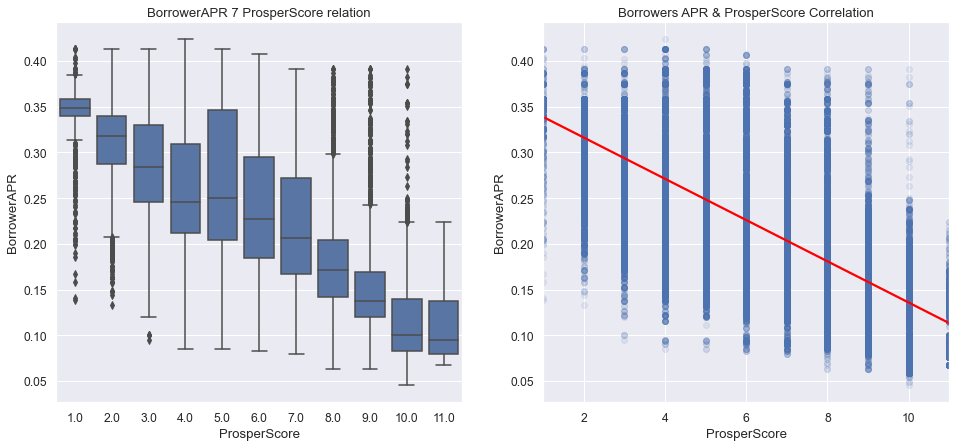

In [59]:
# Plot the correlation between BorrowersAPR and ProsperScore
plt.figure(figsize = (16, 7))
base_color = sns.color_palette()[0]
# Plot on the right 
plt.subplot(1,2,1)
sns.boxplot(data=loan_final, x ='ProsperScore', y ='BorrowerAPR', color = base_color)
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR')
plt.title('BorrowerAPR 7 ProsperScore relation');

#Plot on the left 
plt.subplot(1,2,2)
sns.regplot(data = loan_final, x = 'ProsperScore', y = 'BorrowerAPR', scatter_kws={'alpha':0.1}, line_kws = {'color':'red'})
plt.title('Borrowers APR & ProsperScore Correlation');


- Borrowers annual percentage rate seems to be negative correlated with Prosper Score

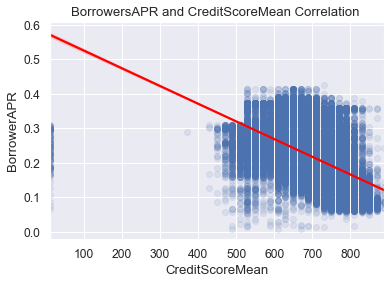

In [60]:
# Plot the Corelation between Borrowers APR and Credit Score 
sns.regplot(data =loan_final, x = 'CreditScoreMean', y = 'BorrowerAPR', scatter_kws={'alpha':0.1}, line_kws = {'color':'red'})
plt.title('BorrowersAPR and CreditScoreMean Correlation ');

- BorrowersAPR is also negative correlated with CreditScoreMean

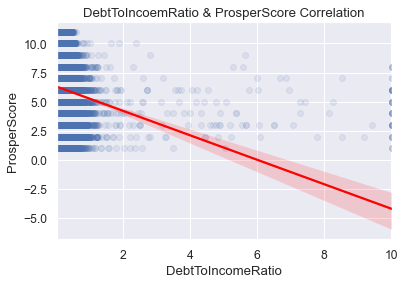

In [61]:
# Plot the Correlation between Debt to income ratio and ProsperScore 
sns.regplot(data =loan_final, x = 'DebtToIncomeRatio', y = 'ProsperScore', scatter_kws={'alpha':0.1}, line_kws = {'color':'red'})
plt.title('DebtToIncoemRatio & ProsperScore Correlation');

- DebtToIncomeRatio is also negative correlated with Prosper Score 

In [62]:
# Groupby BorrowersState to get the median 
state_apr_median = loan_final.groupby('BorrowerState', as_index = False)['BorrowerAPR'].median()

# Sort values by borrowersAPR
state_apr_values = state_apr_median.sort_values(by = 'BorrowerAPR')
state_apr_median = list(state_apr_values['BorrowerState'])

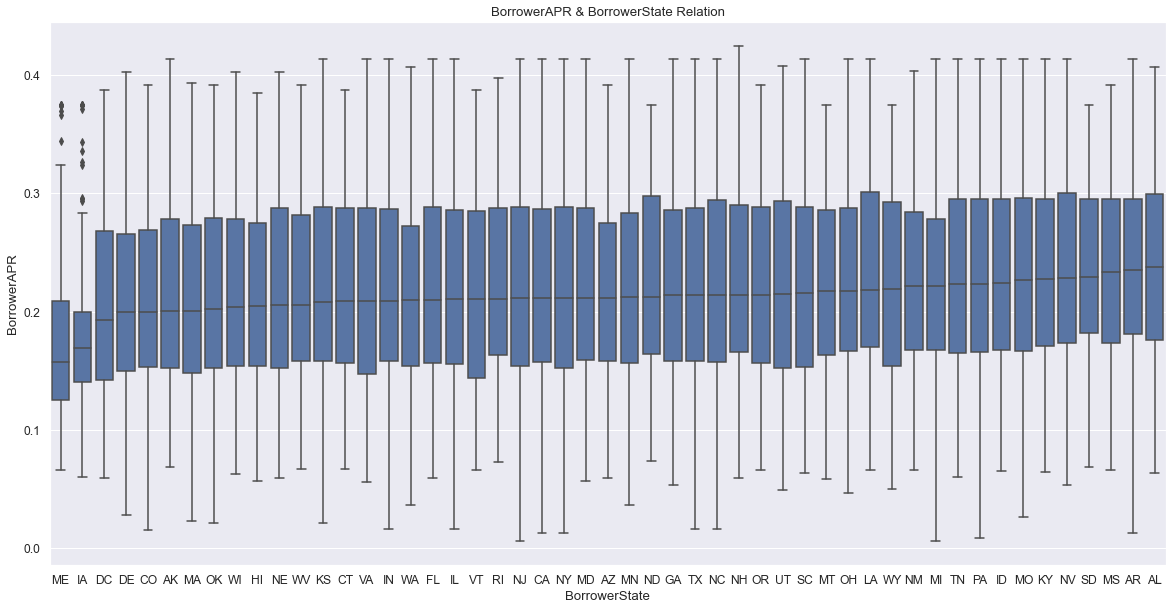

In [63]:
# Plot the box plot for the relation 
plt.figure(figsize = (20, 10))
base_color = sns.color_palette()[0]
sns.boxplot(data = loan_final, x = 'BorrowerState', y = 'BorrowerAPR', order = state_apr_median, color = base_color)
plt.title('BorrowerAPR & BorrowerState Relation');

- ME has the lowest APR at about 0.15 while AL has the highest APR at about 0.25

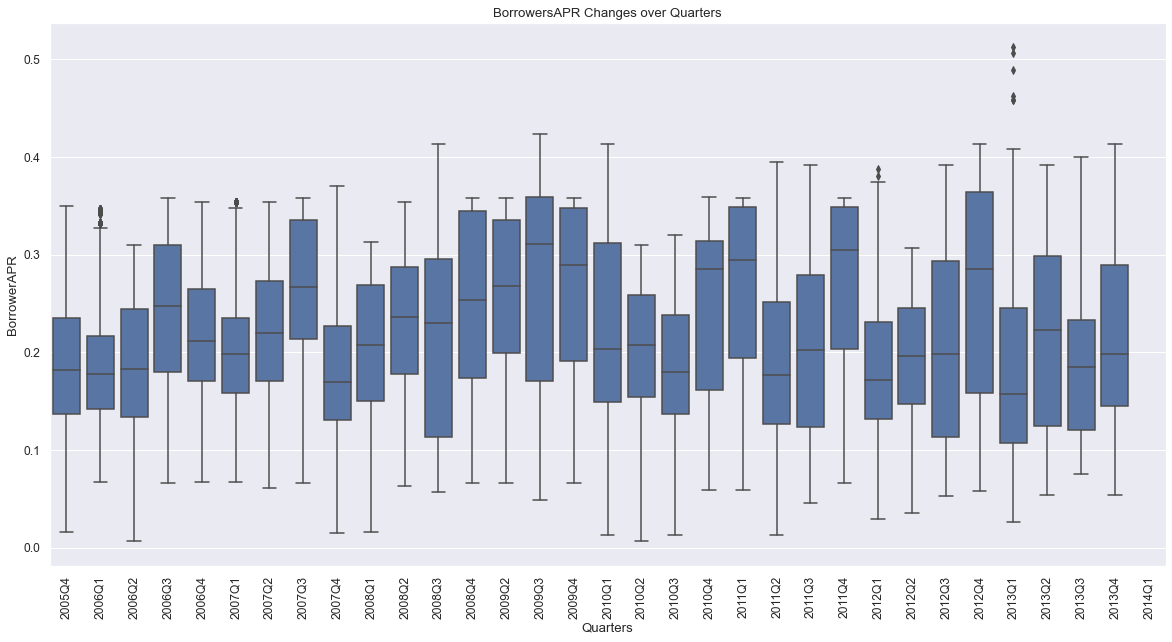

In [64]:
# Plot the changes in borrowerAPR over quarters
order_values = sorted(loan_final['Quarters'].unique())
base_color = sns.color_palette()[0]
plt.figure(figsize = (20, 10))
ax = sns.boxplot(data = loan_final, x = 'Quarters', y='BorrowerAPR', color = base_color)
plt.title('BorrowersAPR Changes over Quarters')
ax.set_xticklabels(order_values,rotation=90);


- the highest median is in 2009Q3, 2011Q1, 2011Q4, and last high median noticed is in 2012Q4, for more analysis i'll plot a year based instead of a quarter 
 

In [65]:
# make year column 
loan_final['year'] = pd.to_datetime(loan_final['ListingCreationDate']).dt.year
loan_final.head()

,ListingCreationDate,CreditScoreMean,Occupation,EmploymentStatus,ProsperScore,Term,MonthlyLoanPayment,StatedMonthlyIncome,BorrowerAPR,DebtToIncomeRatio,RevolvingCreditBalance,BorrowerState,ListingCategory,Quarters,year
0,2007-08-26 19:09:29.263,649.5,Other,Self-employed,NaN,36,330.43,3083.333333,0.16516,0.17,0.0,CO,Not Available,2007Q3,2007
1,2014-02-27 08:28:07.900,689.5,Professional,Employed,7.0,36,318.93,6125.000000,0.12016,0.18,3989.0,CO,Home Improvement,2014Q1,2014
2,2007-01-05 15:00:47.090,489.5,Other,Not available,NaN,36,123.32,2083.333333,0.28269,0.06,NaN,GA,Not Available,2007Q1,2007
3,2012-10-22 11:02:35.010,809.5,Skilled Labor,Employed,9.0,36,321.45,2875.000000,0.12528,0.15,1444.0,GA,Motorcycle,2012Q4,2012
4,2013-09-14 18:38:39.097,689.5,Executive,Employed,4.0,36,563.97,9583.333333,0.24614,0.26,6193.0,MN,Home Improvement,2013Q3,2013


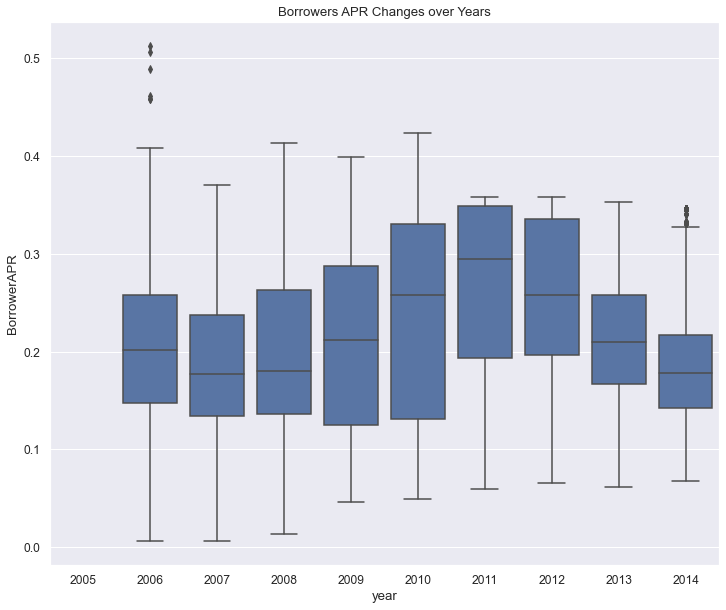

In [66]:
# plot box plot for APR changes over years
plt.figure(figsize = (12, 10))
base_color = sns.color_palette()[0]
sns.boxplot(data = loan_final, x = 'year', y = 'BorrowerAPR', color = base_color)
plt.title('Borrowers APR Changes over Years');

- The median APR is in increase since 2009 until reaches maximum at 2011 and then it falls off to 2014, We can see that our all time high in interest rates came in 2010 as indicated by the whiskers however the median peak came a year later in 2012. Since then the median has continued to drop, another piece of information our box plot gives us is that in the past two years the body of our box plots has narrowed and since 2011 the overall range of interest rates has decreased as well this is good news for borrowers.

In [67]:
# See the relation between Listing category and borrowerapr
# Groupby Listing Category and return the median
listing_cat_median = loan_final.groupby('ListingCategory', as_index = False)['BorrowerAPR'].median()
listing_cat_vars = listing_cat_median.sort_values(by = 'BorrowerAPR')
listing_cat_median = list(listing_cat_vars['ListingCategory'])


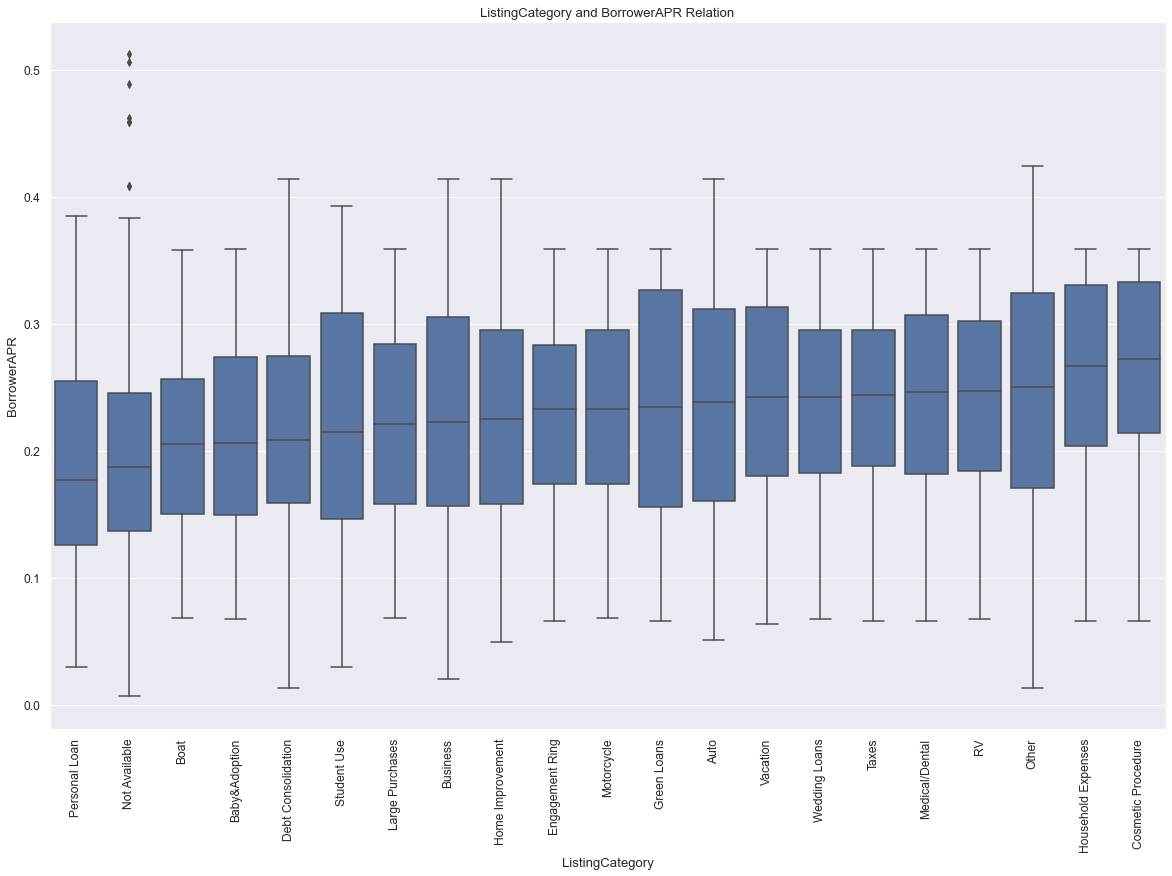

In [68]:
# Plot a box plot for the relation 
plt.figure(figsize=(20, 13))
base_color = sns.color_palette()[0]
ax = sns.boxplot(data = loan_final, x ='ListingCategory', y = 'BorrowerAPR', order = listing_cat_median, color = base_color);
plt.title('ListingCategory and BorrowerAPR Relation')
ax.set_xticklabels(listing_cat_median, rotation = 90);

In [69]:
listing_cat_vars.describe()

,BorrowerAPR
count,21.000000
mean,0.229343
std,0.023895
min,0.176770
25%,0.214800
50%,0.233180
75%,0.243690
max,0.272460


- Personal loan is the lowest at 0.176 and Cosmetic Procedure is the highest at .272 nearly 10 percentage points higher

In [70]:
state_income_median = loan_final.groupby('BorrowerState', as_index = False)['StatedMonthlyIncome'].median()
state_income_vars = state_income_median.sort_values(by = 'StatedMonthlyIncome')
state_income_median = list(state_income_vars['BorrowerState'])

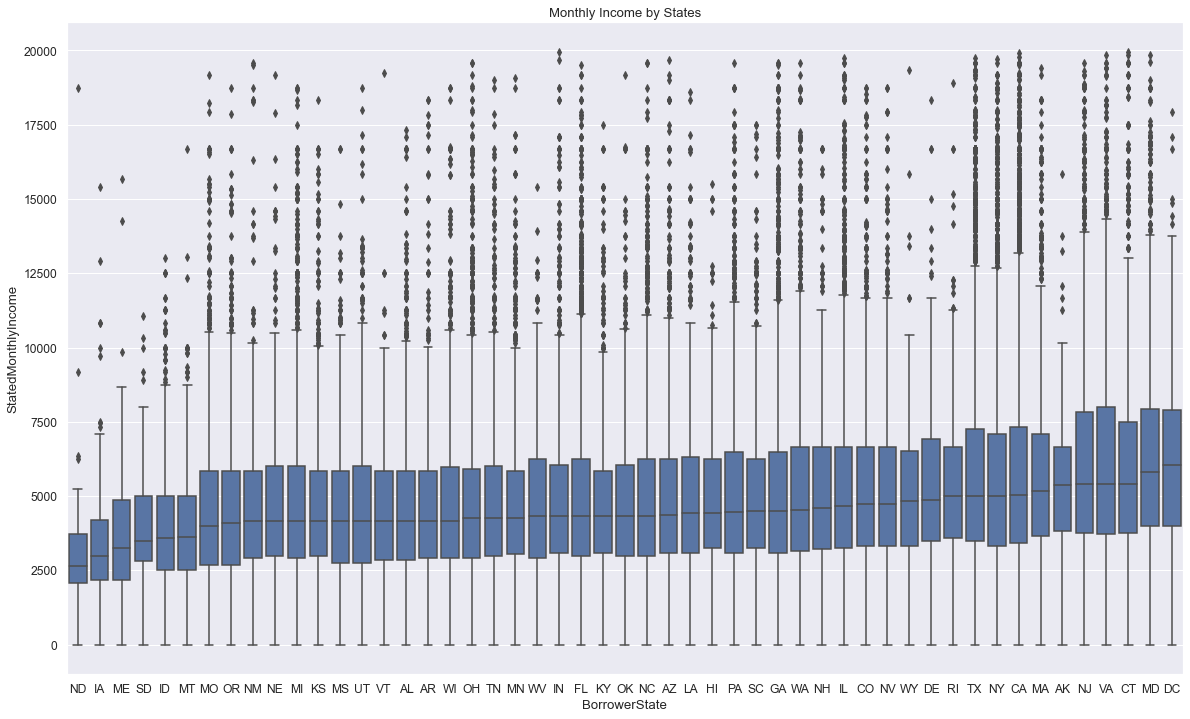

In [71]:
plt.figure(figsize=(20, 12))
base_color = sns.color_palette()[0]
sns.boxplot(data = loan_final, x = 'BorrowerState', y = 'StatedMonthlyIncome', color = base_color, order = state_income_median)
plt.title('Monthly Income by States');

In [72]:
state_income_vars[0:3], state_income_vars[-3:]

(   BorrowerState  StatedMonthlyIncome
 28            ND          2636.166667
 12            IA          3000.000000
 21            ME          3250.000000,
    BorrowerState  StatedMonthlyIncome
 6             CT          5416.666667
 20            MD          5799.333333
 7             DC          6041.666667)

- in this plot. North Dakota is our lowest with a median income of 2,636. DC is our highest with a median income of 6,041.

In [73]:
loan_final.head()

,ListingCreationDate,CreditScoreMean,Occupation,EmploymentStatus,ProsperScore,Term,MonthlyLoanPayment,StatedMonthlyIncome,BorrowerAPR,DebtToIncomeRatio,RevolvingCreditBalance,BorrowerState,ListingCategory,Quarters,year
0,2007-08-26 19:09:29.263,649.5,Other,Self-employed,NaN,36,330.43,3083.333333,0.16516,0.17,0.0,CO,Not Available,2007Q3,2007
1,2014-02-27 08:28:07.900,689.5,Professional,Employed,7.0,36,318.93,6125.000000,0.12016,0.18,3989.0,CO,Home Improvement,2014Q1,2014
2,2007-01-05 15:00:47.090,489.5,Other,Not available,NaN,36,123.32,2083.333333,0.28269,0.06,NaN,GA,Not Available,2007Q1,2007
3,2012-10-22 11:02:35.010,809.5,Skilled Labor,Employed,9.0,36,321.45,2875.000000,0.12528,0.15,1444.0,GA,Motorcycle,2012Q4,2012
4,2013-09-14 18:38:39.097,689.5,Executive,Employed,4.0,36,563.97,9583.333333,0.24614,0.26,6193.0,MN,Home Improvement,2013Q3,2013


In [74]:
loan_final['StatedMonthlyIncome'].describe()

count    110161.000000
mean       5220.583423
std        3034.268250
min           0.000000
25%        3166.666667
50%        4583.333333
75%        6666.666667
max       19958.333333
Name: StatedMonthlyIncome, dtype: float64

In [75]:
loan_final['MonthlyLoanPayment'].describe()

count    110161.000000
mean        255.236572
std         163.315346
min           0.000000
25%         130.200000
50%         208.570000
75%         358.350000
max         799.950000
Name: MonthlyLoanPayment, dtype: float64

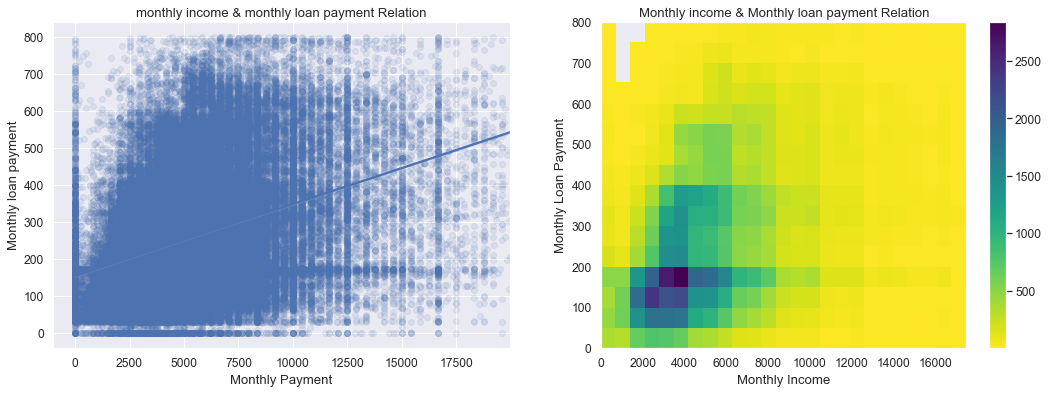

In [76]:
# Plot the relation between the borrower monthly income and monthly loan payment
plt.figure(figsize=(18, 6))
#Plot on the left 
plt.subplot(1, 2, 1)
sns.regplot(data= loan_final, x='StatedMonthlyIncome', y = 'MonthlyLoanPayment', x_jitter =0.04, scatter_kws={'alpha':1/10})
plt.xlabel('Monthly Payment')
plt.ylabel('Monthly loan payment')
plt.title('monthly income & monthly loan payment Relation');
# Plot on the right 
plt.subplot(1, 2, 2)
x_bins =np.arange(0, 18000, 700)
y_bins = np.arange(0, 800+50, 50)
plt.hist2d(data = loan_final, x = 'StatedMonthlyIncome', y = 'MonthlyLoanPayment', cmin = 0.5, cmap = 'viridis_r', bins = [x_bins, y_bins])
plt.colorbar()
plt.xlabel('Monthly Income')
plt.ylabel('Monthly Loan Payment')
plt.title('Monthly income & Monthly loan payment Relation');

- We can see a slight correlation, as income rises as our monthly payment rises along with it, and in the heat map there's enormous amount of trancperancy from 3000-5000 monthly income as most borrowers have income between 3000-5000 monthly and pay for their loan between 100-200 monthly

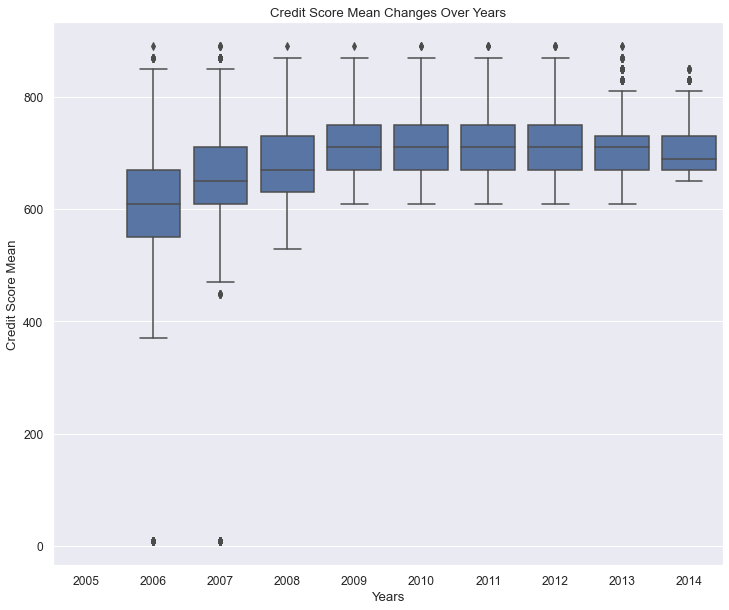

In [77]:
# PLot the changes in Credite Score mean over the years 
plt.figure(figsize=(12, 10))
base_color = sns.color_palette()[0]
sns.boxplot(data = loan_final, x = 'year', y = 'CreditScoreMean', color = base_color)
plt.xlabel('Years')
plt.ylabel('Credit Score Mean')
plt.title('Credit Score Mean Changes Over Years');

- As we see from the plot above credit score ranges were stable between 2009 and 2012, medians were stable between 2009 and 2013. From 2013 to 2014 credit scores have actually decreased.

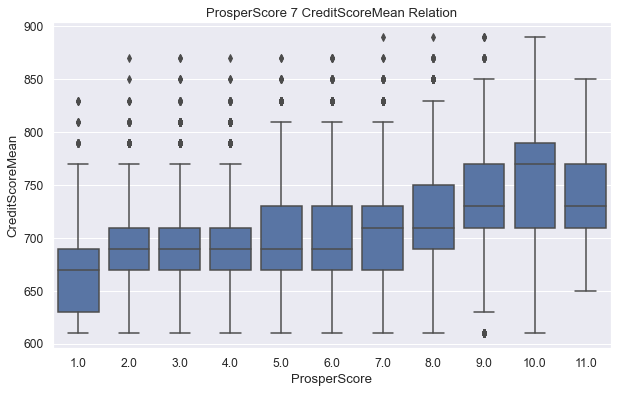

In [78]:
# Plot a box plot for Credit Score mean and prosperScore relation 
plt.figure(figsize =(10, 6))
base_color = sns.color_palette()[0]
sns.boxplot(data = loan_final, x = 'ProsperScore', y = 'CreditScoreMean', color = base_color)
plt.title('ProsperScore 7 CreditScoreMean Relation');

- the correlation in the plot seems to be slightly positive, from 2-6 prosper score we have a constant credit score mean of around 690, and it increases with the increase of Prosperscore until it reaches the maximum of around 775 at 10 prosper score, notice that The output to Prosper users is a Prosper score which ranges from 1 to 11, with 11 being the best, or lowest risk, score. The worst, or highest risk, score, is a 1.

##  Some Of Bivariate Main Conclusion
- the prosperscore was the number one factor in determining a borrower's APR
- most people were taking on loans to consolidate debt
- ND has the lowest monthly income although it's not among the top 20 states taking loans 
- APR was decreasing since 2014 which is great for borrowers

# Multivariate Exploration

In [79]:
loan_final.head()

,ListingCreationDate,CreditScoreMean,Occupation,EmploymentStatus,ProsperScore,Term,MonthlyLoanPayment,StatedMonthlyIncome,BorrowerAPR,DebtToIncomeRatio,RevolvingCreditBalance,BorrowerState,ListingCategory,Quarters,year
0,2007-08-26 19:09:29.263,649.5,Other,Self-employed,NaN,36,330.43,3083.333333,0.16516,0.17,0.0,CO,Not Available,2007Q3,2007
1,2014-02-27 08:28:07.900,689.5,Professional,Employed,7.0,36,318.93,6125.000000,0.12016,0.18,3989.0,CO,Home Improvement,2014Q1,2014
2,2007-01-05 15:00:47.090,489.5,Other,Not available,NaN,36,123.32,2083.333333,0.28269,0.06,NaN,GA,Not Available,2007Q1,2007
3,2012-10-22 11:02:35.010,809.5,Skilled Labor,Employed,9.0,36,321.45,2875.000000,0.12528,0.15,1444.0,GA,Motorcycle,2012Q4,2012
4,2013-09-14 18:38:39.097,689.5,Executive,Employed,4.0,36,563.97,9583.333333,0.24614,0.26,6193.0,MN,Home Improvement,2013Q3,2013


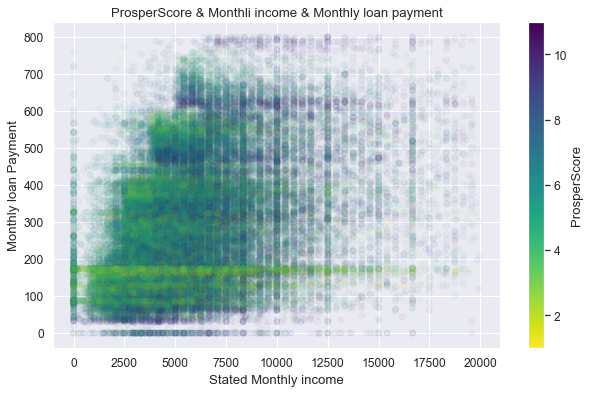

In [80]:
# Plot the relation between Monthly income, ProsperScore and Monthly loan payment
plt.figure(figsize=(10, 6))
plt.scatter(data = loan_final, x = 'StatedMonthlyIncome', y ='MonthlyLoanPayment', c ='ProsperScore', cmap ='viridis_r', alpha = 0.04)
cbar = plt.colorbar(label='ProsperScore')
cbar.solids.set(alpha=1)
plt.title('ProsperScore & Monthli income & Monthly loan payment')
plt.xlabel('Stated Monthly income')
plt.ylabel('Monthly loan Payment');

- From the plot above we can see that Prosper score is in enormous transperancy in low Monthly income, monthly loan payment has slightly positive corelation with monthly payment


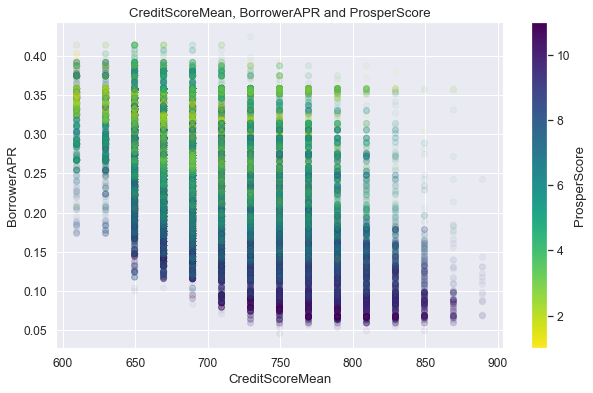

In [88]:
# Plot the relation between prosperScore, CreditScoreMean and APR 
plt.figure(figsize=(10, 6))
plt.scatter(data = loan_final , x = 'CreditScoreMean', y='BorrowerAPR', c ='ProsperScore', cmap ='viridis_r', alpha = 0.05)
cbar = plt.colorbar(label='ProsperScore')
cbar.solids.set(alpha=1)
plt.title('CreditScoreMean, BorrowerAPR and ProsperScore')
plt.xlabel('CreditScoreMean')
plt.ylabel('BorrowerAPR');

- From the plot above high ProsperScores in low BorrowerAPR( < 0.1), and it's negative corelation between APR and Credit Score Mean 

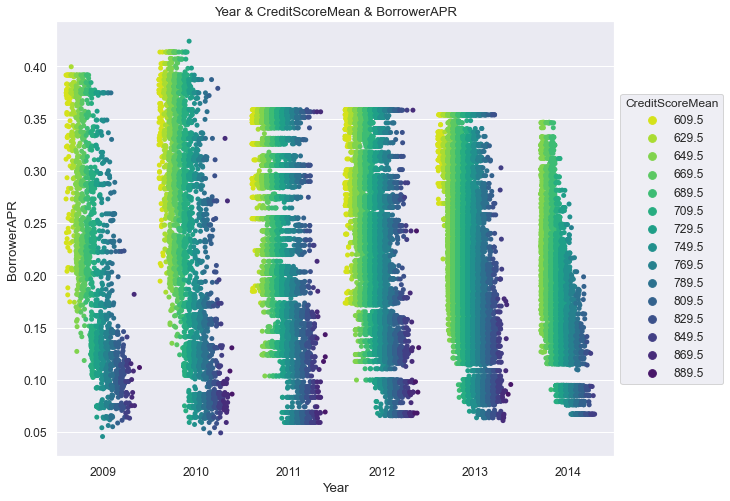

In [86]:
# Plot the relation between Year, CreditScoreMean and APR 

plt.figure(figsize=(10, 8))
sns.stripplot(data = loan_final.query('year >= 2009'), x = 'year', y ='BorrowerAPR', hue ='CreditScoreMean', palette ='viridis_r',
             jitter =0.35, dodge=True)
plt.title('Year & CreditScoreMean & BorrowerAPR')
plt.xlabel('Year')
plt.ylabel('BorrowerAPR')
plt.legend(loc='center left', bbox_to_anchor =(1, 0.5), title ='CreditScoreMean', title_fontsize=12);



- From the plot above we see the CreditScoreMean looks consistant and enormous in lower APR, although in year 2013 CreditScoreMean is very high in all APR values  

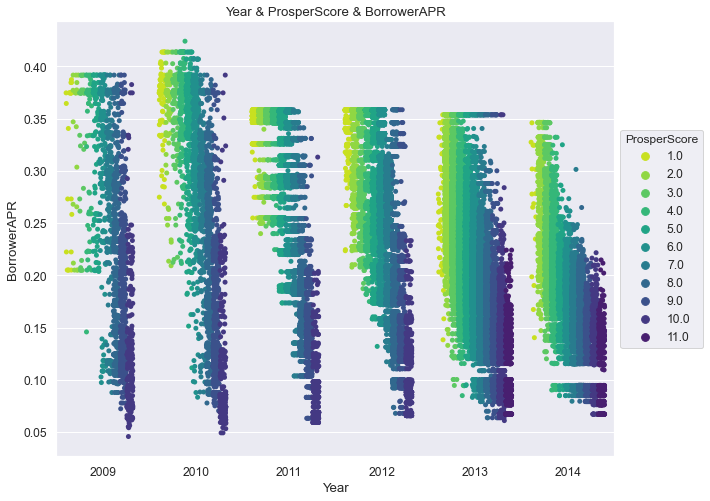

In [85]:
# Plot the relation between Year, APR and ProsperScore 
plt.figure(figsize=(10, 8))
sns.stripplot(data = loan_final.query('year >= 2009'), x = 'year', y ='BorrowerAPR', hue ='ProsperScore', palette ='viridis_r',
             jitter =0.35, dodge=True)
plt.title('Year & ProsperScore & BorrowerAPR')
plt.xlabel('Year')
plt.ylabel('BorrowerAPR')
plt.legend(loc='center left', bbox_to_anchor =(1, 0.5), title ='ProsperScore', title_fontsize=12);

- In the first few years a high prosper score was less indicative of whether you would get a preferred rate, Generaly ProsperScore is very high and enormous in low APR which make sense from the negative corelation between them,  there's also a consistency in Year 2013 which has less yellow color plots.